## Preprocessing

In [1]:
# Load the libraries
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(gridExtra)))
library(emmeans)
library(epitools)

# Load the data
load("~/Documents/holding_gwu_dissertation/data/study1_data.RData")

In [2]:
# Filter people who were already vaccinated
vcf_data <- vcf_data %>% filter(vaccinated_prior == FALSE) 

# Add a "vaccinated" response to intentions that has a value of 8
vcf_data$base_intention <-  factor(vcf_data$base_intention, 
                                levels = c(levels(vcf_data$base_intention),
                                           "Vaccinated"))
vcf_data$intention_2 <-  factor(vcf_data$intention_2, 
                                levels = c(levels(vcf_data$intention_2),
                                           "Vaccinated"))
vcf_data$intention_4 <-  factor(vcf_data$intention_4, 
                                levels = c(levels(vcf_data$intention_4),
                                           "Vaccinated"))
vcf_data$intention_6 <-  factor(vcf_data$intention_6, 
                                levels = c(levels(vcf_data$intention_6),
                                           "Vaccinated"))

# Recode intentions for vaccinated people as a vaccinated (8) response
vcf_data$intention_2[vcf_data$vax_y_n_2 == "Yes"] <- "Vaccinated"
vcf_data$intention_4[vcf_data$vax_y_n_4 == "Yes"] <- "Vaccinated"
vcf_data$intention_6[vcf_data$vax_y_n_6 == "Yes"] <- "Vaccinated"

# Relabel the wave variable
vcf_data$wave <- "Wave 1"
vcf_data$wave[vcf_data$trial == 3] <- "Wave 2"
vcf_data$wave <- factor(vcf_data$wave, levels = c("Wave 1", "Wave 2"))

# Relabel the group variable
vcf_data$group <- vcf_data$group %>% as.character()
vcf_data$group[vcf_data$group == "Gist"] <- "Treatment"
vcf_data$group <- factor(vcf_data$group, levels = c("Treatment", "Control"))

# Apply a z-transform so all outcome variables are on the same scale
z_transform <- function(measure, transform_var){
    mean <- c(vcf_data %>% select(paste0("base_", measure)) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_2")) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_4")) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_6")) %>% unlist() %>% as.numeric()) %>%
              mean(na.rm = TRUE)
    sd <-  c(vcf_data %>% select(paste0("base_", measure)) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_2")) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_4")) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_6")) %>% unlist() %>% as.numeric()) %>%
             sd(na.rm = TRUE)
  
    #Shift the transform by to allow a Box-cox transform later in the workflow
    (((vcf_data %>% select(all_of(transform_var)) %>% unlist() %>% as.numeric()) - mean)/sd) + 4  
}

# Baseline
vcf_data$base_intention_n <- z_transform(measure = "intention", transform_var = "base_intention")
vcf_data$base_encourage_n <- z_transform(measure = "encourage", transform_var = "base_encourage")
vcf_data$base_sp_trust_n <- z_transform(measure = "sp_trust", transform_var = "base_sp_trust")
vcf_data$base_sp_complacency_n <- z_transform(measure = "sp_complacency", transform_var = "base_sp_complacency")
vcf_data$base_sp_necessity_n <- z_transform(measure = "sp_necessity", transform_var = "base_sp_necessity")
vcf_data$base_sp_importance_n <- z_transform(measure = "sp_importance", transform_var = "base_sp_importance")
vcf_data$base_sp_confidence_n <- z_transform(measure = "sp_confidence", transform_var = "base_sp_confidence")
vcf_data$base_sp_safety_n <- z_transform(measure = "sp_safety", transform_var = "base_sp_safety")
vcf_data$base_sp_efficacy_n <- z_transform(measure = "sp_efficacy", transform_var = "base_sp_efficacy")
vcf_data$base_gen_confidence_n <- z_transform(measure = "gen_confidence", transform_var = "base_gen_confidence")
vcf_data$base_gen_safety_n <- z_transform(measure = "gen_safety", transform_var = "base_gen_safety")
vcf_data$base_gen_efficacy_n <- z_transform(measure = "gen_efficacy", transform_var = "base_gen_efficacy")
vcf_data$base_resp_princ_n <- z_transform(measure = "resp_princ", transform_var = "base_resp_princ")

# 6 week
vcf_data$intention_6_n <- z_transform(measure = "intention", transform_var = "intention_6")
vcf_data$encourage_6_n <- z_transform(measure = "encourage", transform_var = "encourage_6")
vcf_data$sp_trust_6_n <- z_transform(measure = "sp_trust", transform_var = "sp_trust_6")
vcf_data$sp_complacency_6_n <- z_transform(measure = "sp_complacency", transform_var = "sp_complacency_6")
vcf_data$sp_necessity_6_n <- z_transform(measure = "sp_necessity", transform_var = "sp_necessity_6")
vcf_data$sp_importance_6_n <- z_transform(measure = "sp_importance", transform_var = "sp_importance_6")
vcf_data$sp_confidence_6_n <- z_transform(measure = "sp_confidence", transform_var = "sp_confidence_6")
vcf_data$sp_safety_6_n <- z_transform(measure = "sp_safety", transform_var = "sp_safety_6")
vcf_data$sp_efficacy_6_n <- z_transform(measure = "sp_efficacy", transform_var = "sp_efficacy_6")
vcf_data$gen_confidence_6_n <- z_transform(measure = "gen_confidence", transform_var = "gen_confidence_6")
vcf_data$gen_safety_6_n <- z_transform(measure = "gen_safety", transform_var = "gen_safety_6")
vcf_data$gen_efficacy_6_n <- z_transform(measure = "gen_efficacy", transform_var = "gen_efficacy_6")
vcf_data$resp_princ_6_n <- z_transform(measure = "resp_princ", transform_var = "resp_princ_6")

# Collapse political views into 3 categories
vcf_data$political_view2 <- vcf_data$political_view
vcf_data$political_view2[vcf_data$political_view2 %in% 
                          c("Slightly conservative",
                            "Very conservative")] <- "Conservative"
vcf_data$political_view2[vcf_data$political_view2 %in% 
                           c("Slightly liberal",
                             "Very liberal")] <- "Liberal"
vcf_data$political_view2[vcf_data$political_view2 == "Prefer not to answer"] <- "No answer"
vcf_data$political_view2 <- factor(
    vcf_data$political_view2,
    levels = c("Moderate", "Liberal", "Conservative", "No answer")
)

## ANCOVA Analysis Workflow

https://mran.microsoft.com/web/packages/emmeans/vignettes/comparisons.html

### Fit a base model

In [3]:
base_model <- aov(intention_6_n ~ group + wave + base_intention_n, data = vcf_data)
print(car::Anova(base_model, type = "III"))

Anova Table (Type III tests)

Response: intention_6_n
                 Sum Sq  Df  F value  Pr(>F)    
(Intercept)        8.07   1   9.3187 0.00242 ** 
group              2.14   1   2.4727 0.11664    
wave               0.37   1   0.4296 0.51255    
base_intention_n 165.38   1 190.9244 < 2e-16 ***
Residuals        344.75 398                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Calculate the optimal lambda for a Box-Cox transform

[1] -4.073665

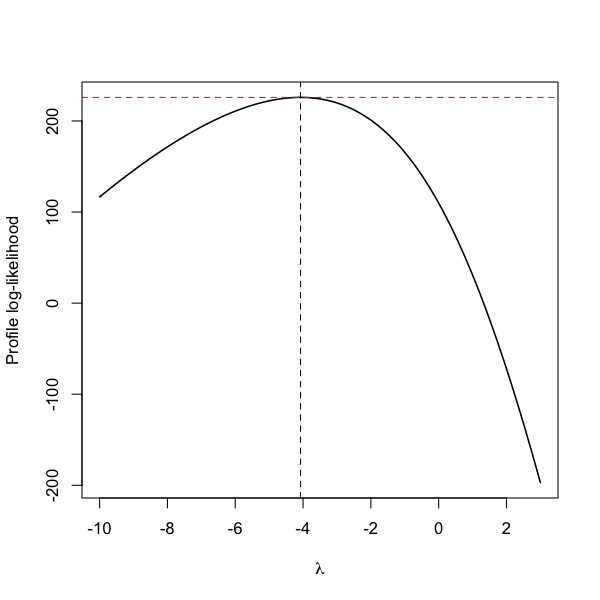

In [4]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)
bc <- trafo::boxcox(base_model, method = "ml", lambdarange = c(-10, 3))
(lambda <- bc$lambdahat)

### Fit a model using the Box-Cox transformed data

In [5]:
bctrans <- make.tran("boxcox", lambda)
model <- with(bctrans, 
              aov(linkfun(intention_6_n) ~ group + wave + linkfun(base_intention_n), data = vcf_data))
print(car::Anova(model, type = "III")) 

Anova Table (Type III tests)

Response: linkfun(intention_6_n)
                              Sum Sq  Df  F value    Pr(>F)    
(Intercept)               8.1330e-06   1  32.3505 2.496e-08 ***
group                     9.0200e-07   1   3.5885   0.05891 .  
wave                      2.5000e-08   1   0.0992   0.75290    
linkfun(base_intention_n) 6.6481e-05   1 264.4542 < 2.2e-16 ***
Residuals                 1.0005e-04 398                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Plot the expected marginal means

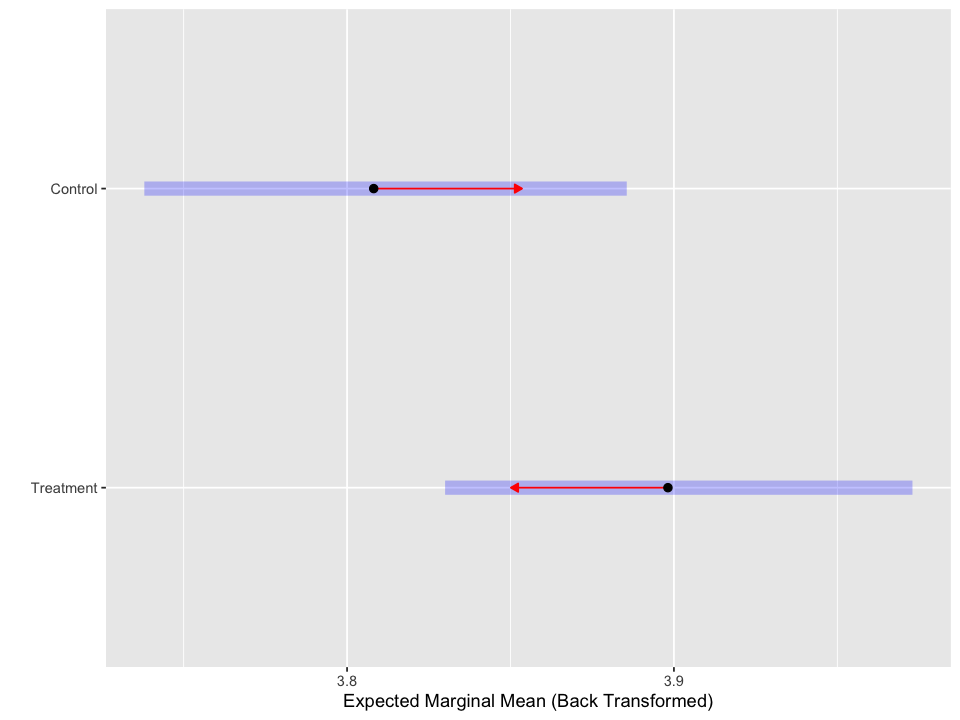

In [6]:
emm_back <- emmeans(model, "group", type = "response")
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 120)
suppressWarnings(plot(emm_back, comparisons = TRUE) + 
                 labs(x = "Expected Marginal Mean (Back Transformed)", y = ""))

### Calcualte the difference between expected marginal means

In [7]:
rg <- ref_grid(model, "group")
emm_diff_back <- pairs(emmeans(regrid(rg, transform = "response"), "group"))
print(emm_diff_back)

 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control     0.09 0.0472 398   1.906  0.0573

Results are averaged over the levels of: wave 


### Calculate 95% CI for Difference in Expected Marginal Means

In [8]:
emm_diff_back %>% confint() %>% print()

 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control     0.09 0.0472 398 -0.00282    0.183

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


## Modularize Code

In [9]:
# ANCOVA using a Box-Cox Transformation
get_emm_diff_bc <- function(data, label, method = "ml"){
    # fit base model
    base_model <- aov(post ~ group + wave + pre, data = data)
    
    # calculate Box-Cox lambda
    bc <- trafo::boxcox(base_model, method = method, lambdarange = c(-10, 3), plotit = FALSE)
    (lambda <- bc$lambdahat)
    bctrans <- make.tran("boxcox", lambda)
  
    # fit model to transformed data
    model <- with(bctrans,
              aov(linkfun(post) ~ group + wave + linkfun(pre), data = data))    
    
    # plot estimated marginal means
    emm_back <- emmeans(model, "group", type = "response")
    print(emm_back)    
    
    # calculate differences in expected marginal means
    rg <- ref_grid(model, "group")
    emm_diff_back <- pairs(emmeans(regrid(rg, transform = "response"), "group"))
    print(emm_diff_back)
    
    # calculate 95% CI for difference in expected marginal means
    ci <- emm_diff_back %>% confint()
    print(ci)
    
    # assemble results
    mean <- ci$estimate
    low <- ci$lower.CL
    high <- ci$upper.CL
    p <- summary(emm_diff_back)$p.value
    ci_summary <- paste0("mean = ", round(mean, 3), 
                         "; 95% CI = ", round(low, 3), ", ", round(high, 3), 
                         "; P = ", round(p, 4))
    plot_points <- tibble(x = c(low, mean, high), label = label)
    return(list(
        "base_model" = base_model,
        "lambda" = lambda,
        "model" = model,
        "CI" = ci_summary,
        "plot_points" = plot_points))
}

# ANCOVA using a Rank Transformation
get_emm_diff_rank_trans <- function(data, measure, label){
    temp <- data %>% select(pre = paste0("base_", measure), 
                            two = paste0(measure, "_2"), 
                            four = paste0(measure, "_4"), 
                            post = paste0(measure, "_6"),
                            group, wave) %>%
            mutate(pre = pre %>% as.numeric(),
                   two = two %>% as.numeric(),
                   four = four %>% as.numeric(),
                   post = post %>% as.numeric())
    # fit model to transformed data
    base_model <- aov(post ~ group + wave + pre, data = temp)
    
    # apply rank transformation
    temp$pre <- temp$pre %>% rank(na.last = "keep")
    temp$two <- temp$two %>% rank(na.last = "keep")
    temp$four <- temp$four %>% rank(na.last = "keep")
    temp$post <- temp$post %>% rank(na.last = "keep")
  
    # apply z transform
    mean <- mean(c(temp$pre, temp$two, temp$four, temp$post), na.rm = TRUE)
    sd <- sd(c(temp$pre, temp$two, temp$four, temp$post), na.rm = TRUE)
    temp$pre <- ((temp %>% select(pre) %>% unlist() %>% as.numeric()) - mean)/sd
    temp$post <- ((temp %>% select(post) %>% unlist() %>% as.numeric()) - mean)/sd
  
    # fit model to transformed data
    model <- aov(post ~ group + wave + pre, data = temp)
  
    # plot estimated marginal means
    emm_transformed <- emmeans(model, "group")
    print(emm_transformed)
    plot(emm_transformed, comparisons = TRUE) + 
    labs(x = "Expected Marginal Mean (Rank Transformed)", y = "")
  
    # calculate differences in expected marginal means
    emm_diff_transformed <- suppressWarnings(pairs(emm_transformed))
    print(emm_diff_transformed)
  
    # calculate 95% CI for difference in expected marginal means
    ci <- emm_diff_transformed %>% confint()
    print(ci)
  
    # assemble results
    mean <- ci$estimate
    low <- ci$lower.CL
    high <- ci$upper.CL
    p <- summary(emm_diff_transformed)$p.value
    ci_summary <- paste0("mean = ", round(mean, 2), 
                         "; 95% CI = ", round(low, 2), ", ", round(high, 2), 
                         "; P = ", round(p, 4))
    plot_points <- tibble(x = c(low, mean, high),
                          label = label)
  
    return(list(
        "base_model" = base_model,
        "model" = model,
        "CI" = ci_summary,
        "plot_points" = plot_points))}


plot_qqs_hist <- function(object){
    op <- par(pty = "s", mfrow = c(2, 2))
    qqnorm(object$base_model$residuals, main = "QQ-Plot Fit to Raw Scores")
    qqline(object$base_model$residuals)
    qqnorm(object$model$residuals, main = "QQ-Plot Fit to Transformed Scores")
    qqline(object$model$residuals)
    object$base_model$residuals %>% hist(main = "Residuals (Raw)", freq = FALSE)  
    object$model$residuals %>% hist(main = "Residuals (Transformed)", freq = FALSE)
}

get_pre_post_means <- function(data, label){
    data <- data %>% filter(!is.na(post))
    tbl <- data %>% group_by(group) %>%
        summarise(N = n(),
                  baseline = paste0(round(mean(pre),2), " (", round(sd(pre), 2), ")"),
                  `6_wk` = paste0(round(mean(post),2), " (", round(sd(post), 2), ")"),
                  mean_diff = paste0(round(mean(post-pre),3), " (", round(sd(post-pre), 2), ")"))
    tbl$p <- c(round(wilcox.test(data$post[data$group == "Treatment"], data$pre[data$group == "Treatment"], paired = TRUE, var.equal = TRUE, alternative = "greater")$p.value, 6),
               round(wilcox.test(data$post[data$group == "Control"], data$pre[data$group == "Control"], paired = TRUE, var.equal = TRUE, alternative = "greater")$p.value, 6))
    tbl$label <- label
    tbl <- tbl %>% dplyr::select(label, group, N, baseline, `6_wk`, mean_diff, p)
    tbl
}

### Calculate results for each outcome

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
intention,Treatment,225,1.78 (1.41),2.49 (2.2),0.707 (1.86),0.000000
intention,Control,177,1.69 (1.26),2.12 (1.96),0.429 (1.54),0.000347


 group     response     SE  df lower.CL upper.CL
 Treatment     3.90 0.0363 398     3.83     3.97
 Control       3.81 0.0374 398     3.74     3.89

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -4.074) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control     0.09 0.0472 398   1.906  0.0573

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control     0.09 0.0472 398 -0.00282    0.183

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


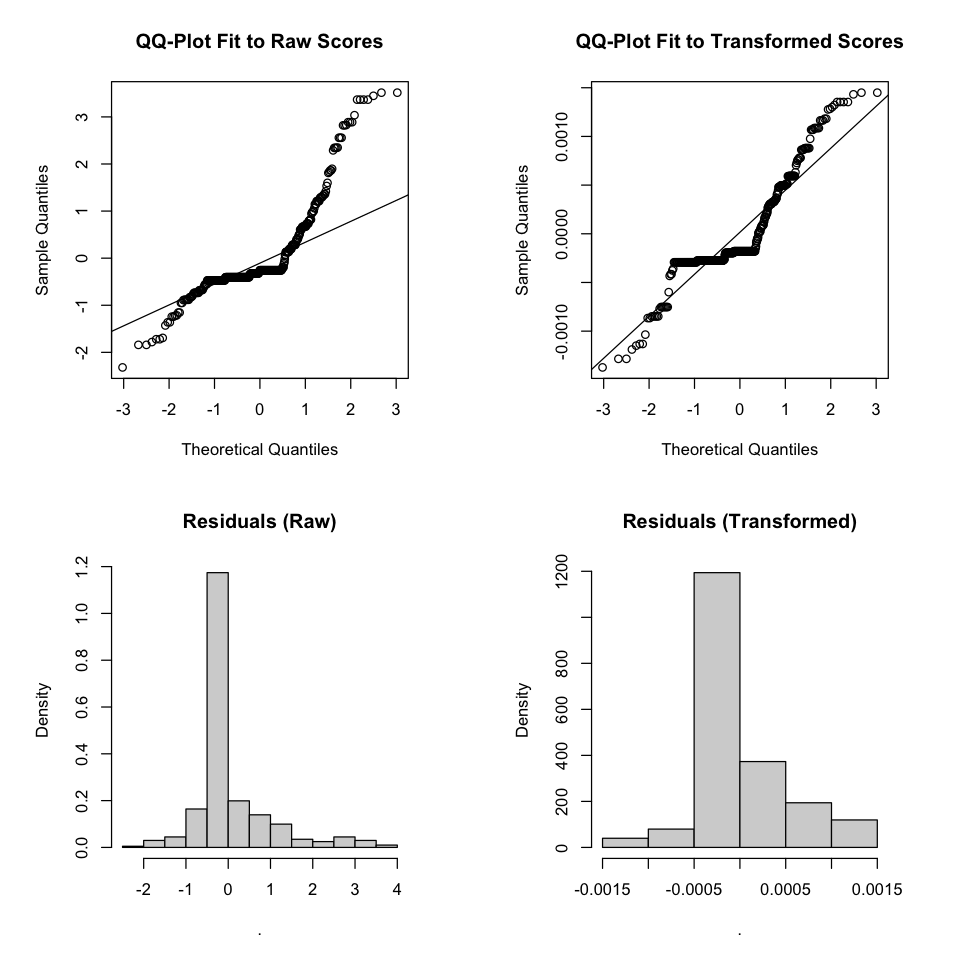

In [10]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_intention %>% as.numeric(), 
                                             post = intention_6 %>% as.numeric()), label = "intention")

intention <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = intention_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_intention_n),   
                             method = "ml", label = "intention")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(intention)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
encourage,Treatment,225,2.03 (1.55),2.65 (1.91),0.627 (1.67),0.000000
encourage,Control,178,1.9 (1.5),2.23 (1.81),0.331 (1.43),0.002634


 group     response     SE  df lower.CL upper.CL
 Treatment     3.99 0.0483 399     3.90     4.09
 Control       3.82 0.0483 399     3.73     3.92

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -2.498) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control    0.176 0.0631 399   2.789  0.0055

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control    0.176 0.0631 399   0.0519      0.3

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


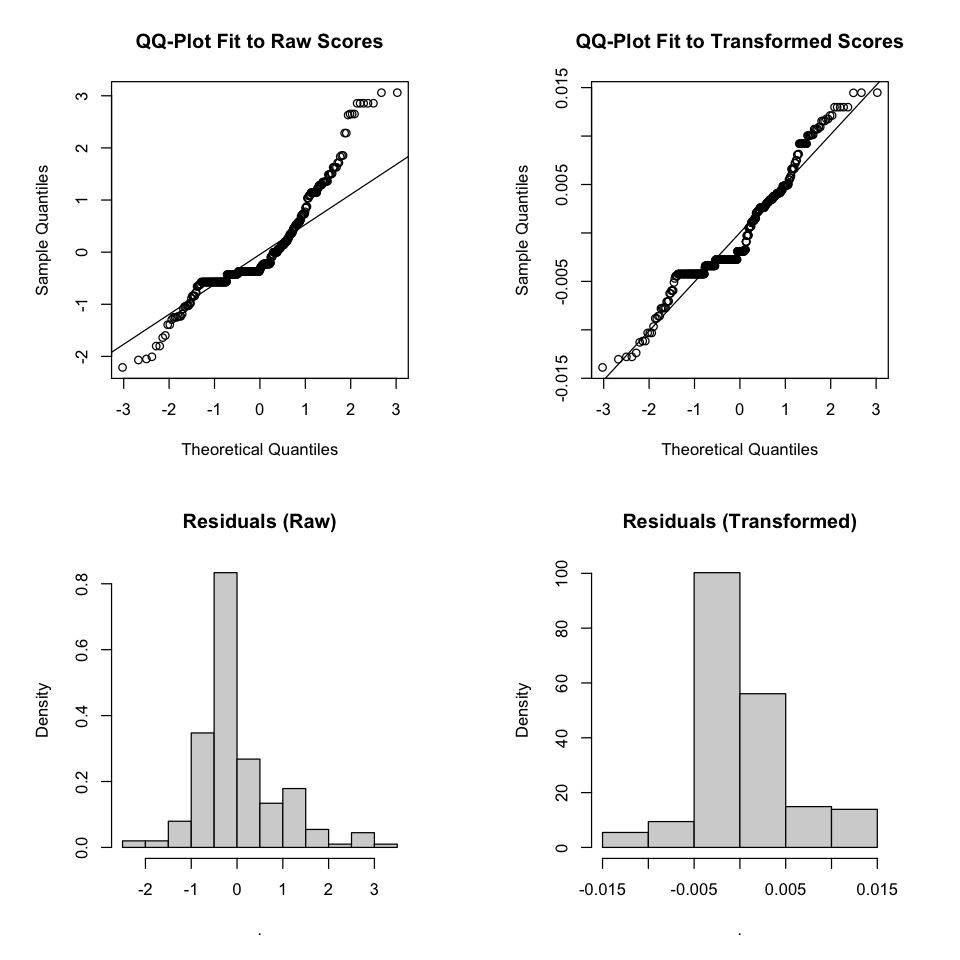

In [11]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_encourage %>% as.numeric(), 
                                             post = encourage_6 %>% as.numeric()), label = "encourage")

encourage <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = encourage_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_encourage_n),   
                             method = "ml", label = "encourage")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(encourage)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_confidence,Treatment,225,2.02 (0.98),2.4 (1.25),0.376 (0.89),0e+00
sp_confidence,Control,178,1.87 (0.95),2.21 (1.15),0.337 (0.88),1e-06


 group     response     SE  df lower.CL upper.CL
 Treatment     4.04 0.0498 399     3.94     4.14
 Control       4.00 0.0579 399     3.89     4.12

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -0.584) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control   0.0394 0.0724 399   0.545  0.5862

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control   0.0394 0.0724 399   -0.103    0.182

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


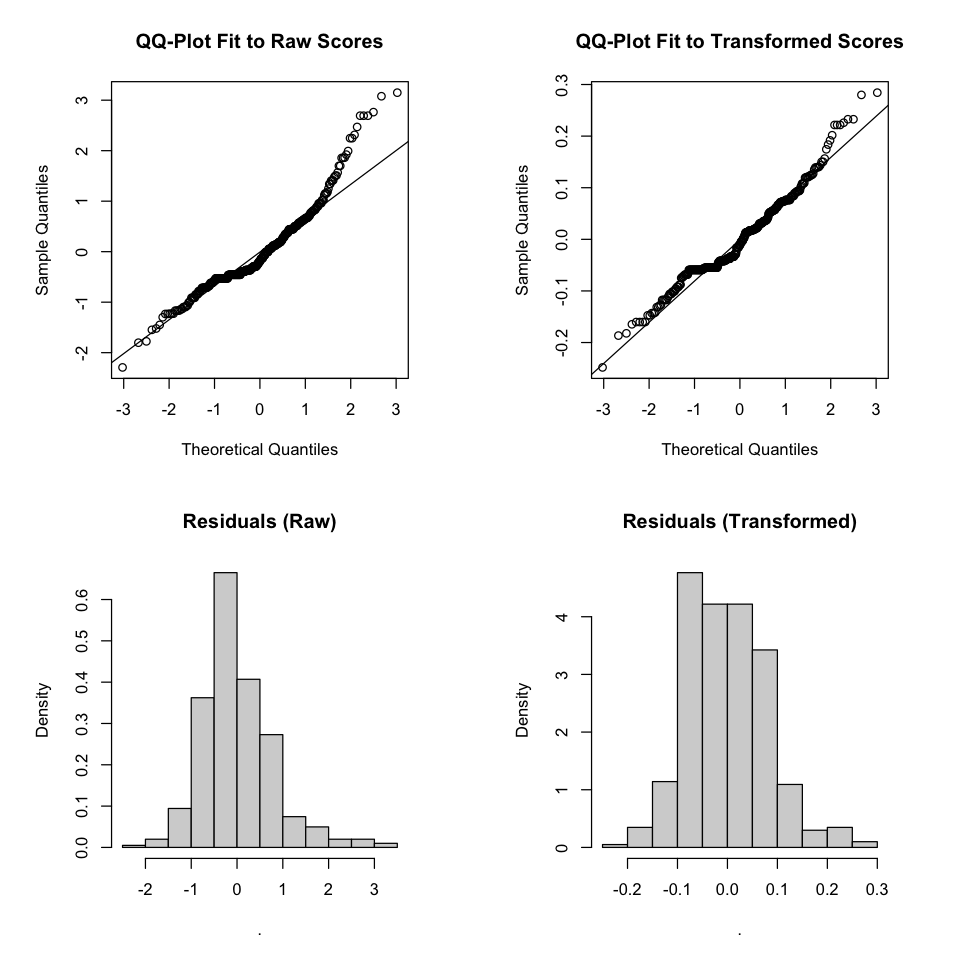

In [12]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_confidence %>% as.numeric(), 
                                             post = sp_confidence_6 %>% as.numeric()), label = "sp_confidence")

sp_confidence <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_confidence_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_confidence_n),   
                             method = "ml", label = "sp_confidence")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_confidence)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_safety,Treatment,225,2.09 (1.11),2.47 (1.33),0.382 (1.04),0.0e+00
sp_safety,Control,178,1.87 (1),2.18 (1.16),0.309 (0.97),3.5e-05


 group     response     SE  df lower.CL upper.CL
 Treatment     4.04 0.0536 399     3.94     4.15
 Control       3.96 0.0614 399     3.84     4.08

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -0.568) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control   0.0863 0.0772 399   1.119  0.2640

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control   0.0863 0.0772 399  -0.0654    0.238

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


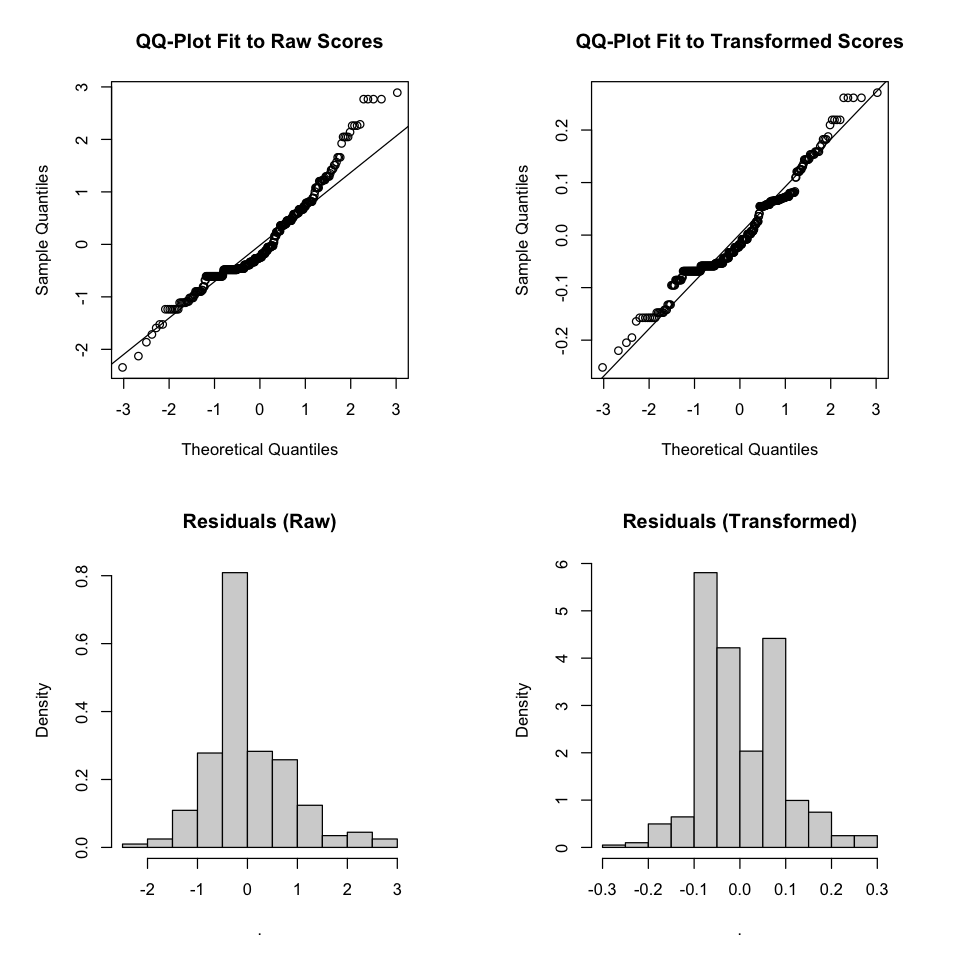

In [13]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_safety %>% as.numeric(), 
                                             post = sp_safety_6 %>% as.numeric()), label = "sp_safety")

sp_safety <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_safety_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_safety_n),   
                             method = "ml", label = "sp_safety")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_safety)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_efficacy,Treatment,225,1.96 (1.04),2.32 (1.31),0.369 (1.03),0e+00
sp_efficacy,Control,178,1.87 (1.04),2.24 (1.24),0.365 (0.98),1e-06


 group     response     SE  df lower.CL upper.CL
 Treatment     4.01 0.0526 399     3.91     4.11
 Control       3.99 0.0612 399     3.88     4.12

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -0.774) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control   0.0131 0.0764 399   0.172  0.8638

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control   0.0131 0.0764 399   -0.137    0.163

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


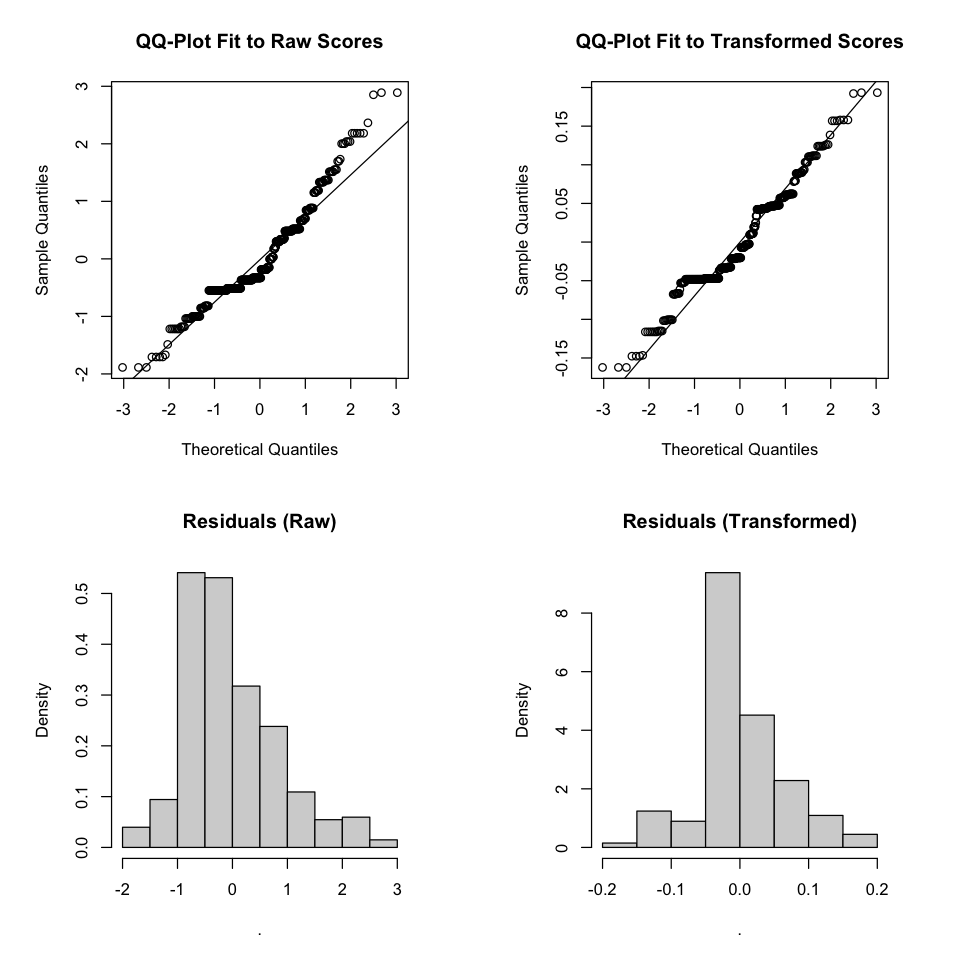

In [14]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_efficacy %>% as.numeric(), 
                                             post = sp_efficacy_6 %>% as.numeric()), label = "sp_efficacy")

sp_efficacy <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_efficacy_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_efficacy_n),   
                             method = "ml", label = "sp_efficacy")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_efficacy)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_complacency,Treatment,225,2.17 (1.09),2.53 (1.29),0.367 (0.98),0.000000
sp_complacency,Control,178,2.09 (1.13),2.32 (1.26),0.236 (0.91),0.001202


 group     response     SE  df lower.CL upper.CL
 Treatment     4.07 0.0508 399     3.97     4.17
 Control       3.95 0.0570 399     3.84     4.07

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -0.379) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control     0.12 0.0724 399   1.654  0.0989

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control     0.12 0.0724 399  -0.0226    0.262

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


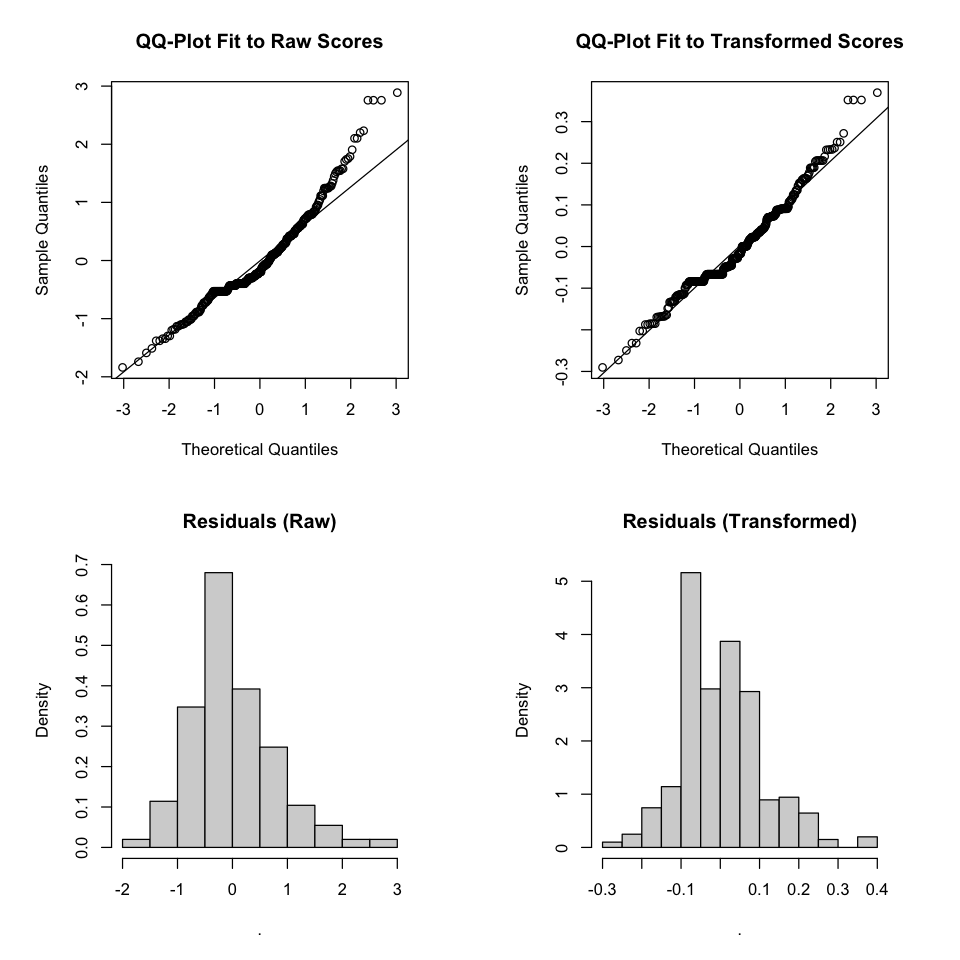

In [15]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_complacency %>% as.numeric(), 
                                             post = sp_complacency_6 %>% as.numeric()), label = "sp_complacency")

sp_complacency <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_complacency_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_complacency_n),   
                             method = "ml", label = "sp_complacency")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_complacency)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_importance,Treatment,225,2.24 (1.15),2.62 (1.34),0.378 (1.04),0.0e+00
sp_importance,Control,178,2.11 (1.17),2.42 (1.32),0.315 (1.03),5.3e-05


 group     response     SE  df lower.CL upper.CL
 Treatment     4.06 0.0526 399     3.96     4.17
 Control       3.98 0.0603 399     3.86     4.10

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -0.181) scale 
 contrast            estimate    SE  df t.ratio p.value
 Treatment - Control   0.0812 0.076 399   1.068  0.2860

Results are averaged over the levels of: wave 
 contrast            estimate    SE  df lower.CL upper.CL
 Treatment - Control   0.0812 0.076 399  -0.0682    0.231

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


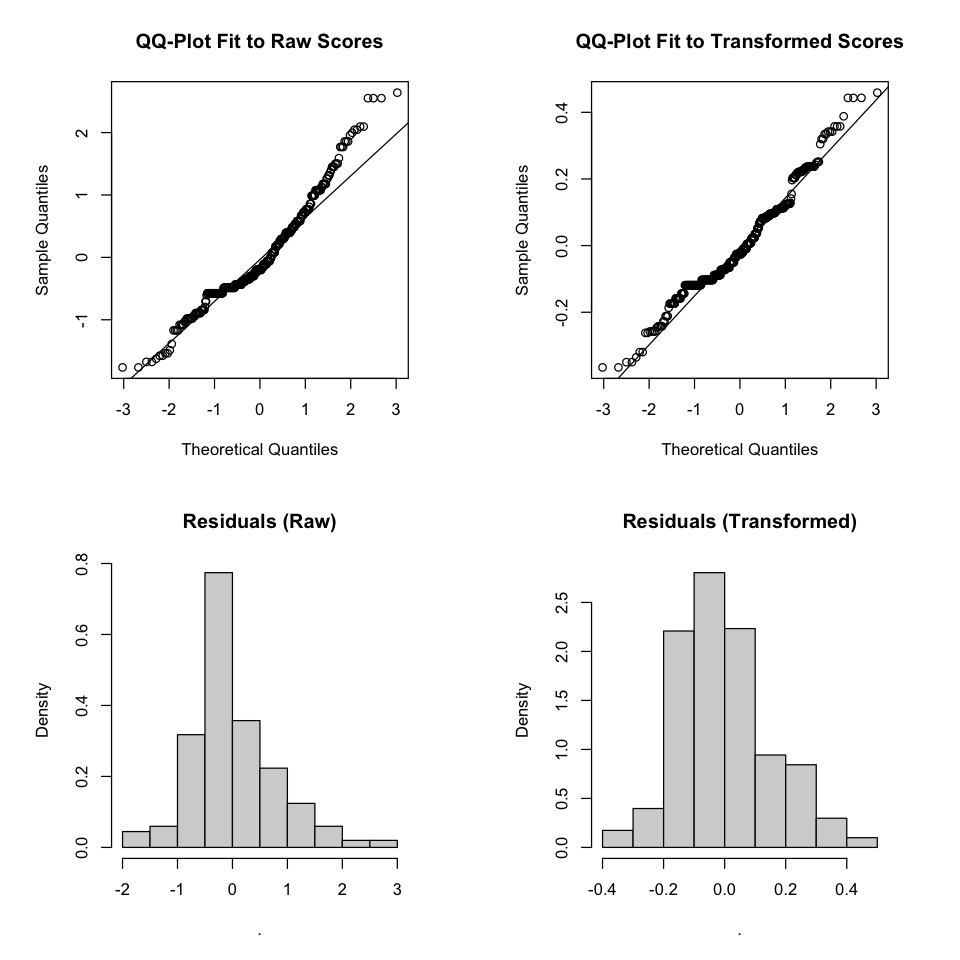

In [16]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_importance %>% as.numeric(), 
                                             post = sp_importance_6 %>% as.numeric()), label = "sp_importance")

sp_importance <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_importance_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_importance_n),   
                             method = "ml", label = "sp_importance")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_importance)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_necessity,Treatment,225,2.09 (1.1),2.45 (1.33),0.356 (1.07),0.000002
sp_necessity,Control,178,2.07 (1.14),2.22 (1.29),0.157 (0.96),0.018209


 group     response     SE  df lower.CL upper.CL
 Treatment     4.05 0.0534 399     3.95     4.16
 Control       3.90 0.0581 399     3.79     4.02

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -0.758) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control    0.157 0.0745 399   2.102  0.0361

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control    0.157 0.0745 399   0.0102    0.303

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


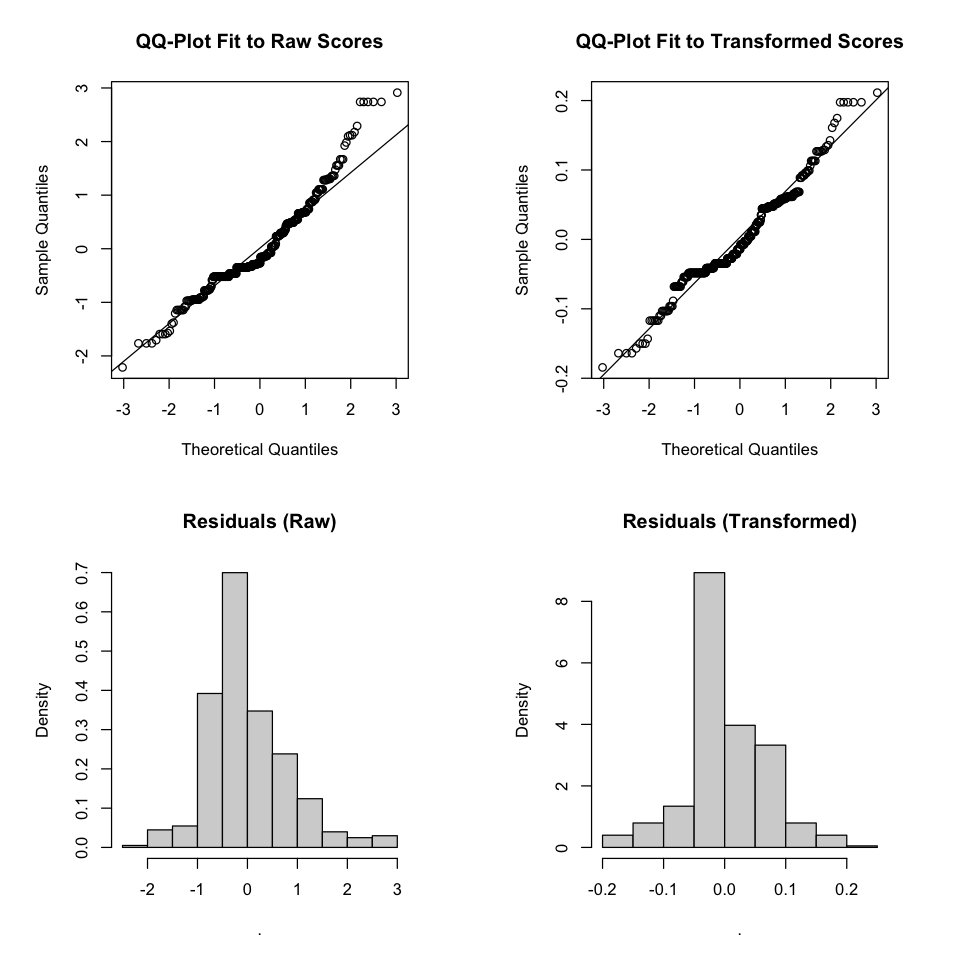

In [17]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_necessity %>% as.numeric(), 
                                             post = sp_necessity_6 %>% as.numeric()), label = "sp_necessity")

sp_necessity <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_necessity_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_necessity_n),   
                             method = "ml", label = "sp_necessity")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_necessity)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
sp_trust,Treatment,225,1.86 (1.04),2.24 (1.29),0.387 (0.97),0
sp_trust,Control,178,1.66 (0.89),2 (1.17),0.337 (0.85),0


 group     response     SE  df lower.CL upper.CL
 Treatment     4.02 0.0491 399     3.93     4.12
 Control       3.95 0.0558 399     3.84     4.06

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
Intervals are back-transformed from the Box-Cox (lambda = -1.104) scale 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control   0.0788 0.0702 399   1.123  0.2619

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control   0.0788 0.0702 399  -0.0591    0.217

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


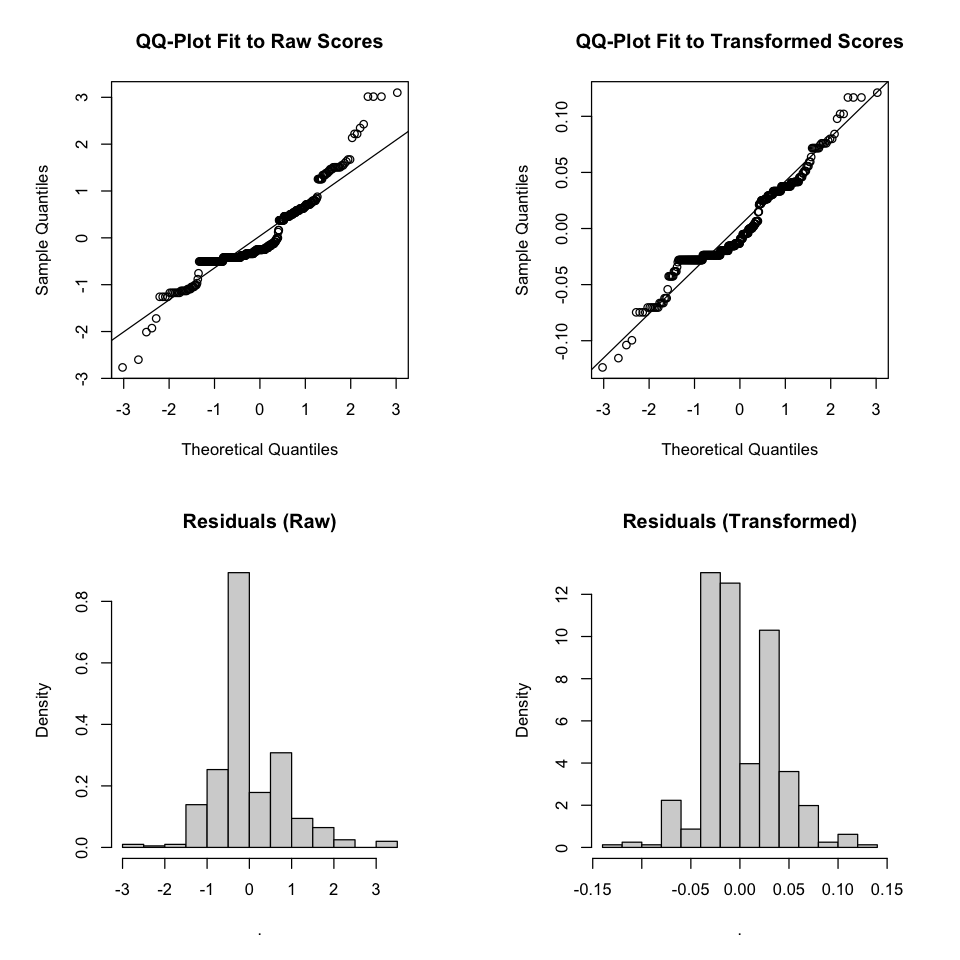

In [18]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_sp_trust %>% as.numeric(), 
                                             post = sp_trust_6 %>% as.numeric()), label = "sp_trust")

sp_trust <- get_emm_diff_bc(data = vcf_data %>% 
                             select(post = sp_trust_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_trust_n),   
                             method = "ml", label = "sp_trust")
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 120)
plot_qqs_hist(sp_trust)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
gen_confidence,Treatment,225,4.28 (1.55),4.75 (1.61),0.467 (1.34),0.000000
gen_confidence,Control,178,4.34 (1.62),4.6 (1.53),0.258 (1.19),0.009704


 group       emmean     SE  df lower.CL upper.CL
 Treatment -0.00701 0.0494 399   -0.104   0.0901
 Control   -0.17850 0.0574 399   -0.291  -0.0656

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control    0.171 0.0724 399   2.369  0.0183

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control    0.171 0.0724 399   0.0292    0.314

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


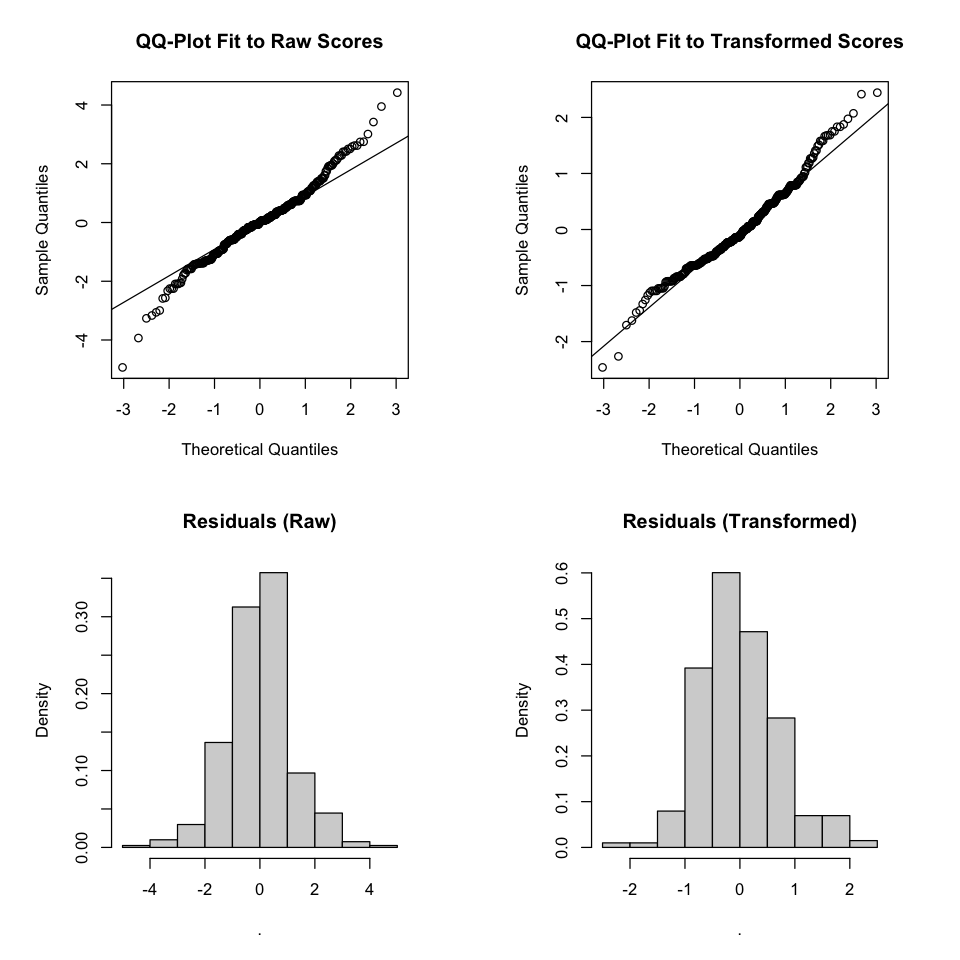

In [19]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_gen_confidence %>% as.numeric(), 
                                             post = gen_confidence_6 %>% as.numeric()), label = "gen_confidence")

gen_confidence <- get_emm_diff_rank_trans(data = vcf_data, measure = "gen_confidence", 
                                          label = "gen_confidence")
plot_qqs_hist(gen_confidence)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
gen_safety,Treatment,225,4.1 (1.61),4.59 (1.67),0.484 (1.5),0.000001
gen_safety,Control,178,4.18 (1.63),4.45 (1.61),0.27 (1.26),0.006063


 group      emmean     SE  df lower.CL upper.CL
 Treatment -0.0154 0.0518 399   -0.117   0.0864
 Control   -0.1591 0.0602 399   -0.277  -0.0407

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control    0.144 0.0759 399   1.892  0.0592

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control    0.144 0.0759 399 -0.00561    0.293

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


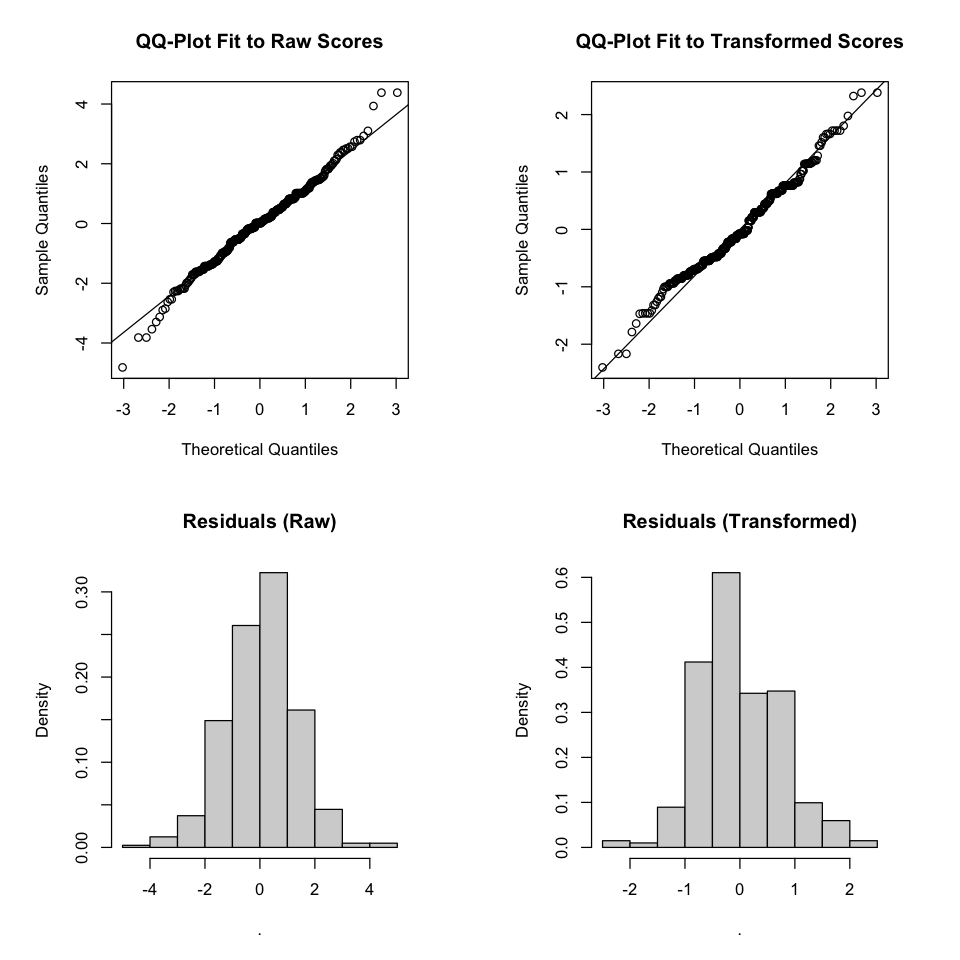

In [20]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_gen_safety %>% as.numeric(), 
                                             post = gen_safety_6 %>% as.numeric()), label = "gen_safety")

gen_safety <- get_emm_diff_rank_trans(data = vcf_data, measure = "gen_safety", 
                                          label = "gen_safety")
plot_qqs_hist(gen_safety)

label,group,N,baseline,6_wk,mean_diff,p
<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>
gen_efficacy,Treatment,225,4.46 (1.61),4.91 (1.64),0.449 (1.38),0.000001
gen_efficacy,Control,178,4.5 (1.73),4.75 (1.57),0.247 (1.39),0.017169


 group      emmean     SE  df lower.CL upper.CL
 Treatment -0.0142 0.0509 399   -0.114   0.0859
 Control   -0.1820 0.0593 399   -0.298  -0.0655

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control    0.168 0.0747 399   2.247  0.0252

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control    0.168 0.0747 399    0.021    0.314

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


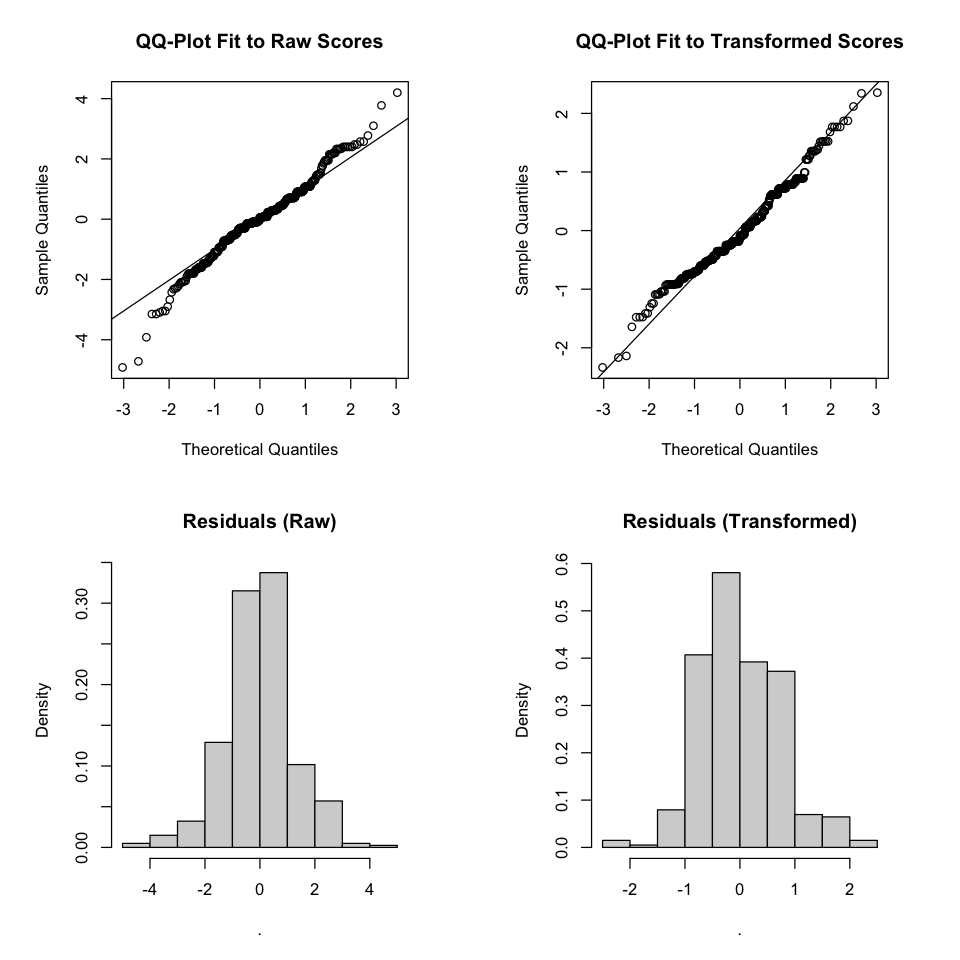

In [21]:
get_pre_post_means(data = vcf_data %>% mutate(pre = base_gen_efficacy %>% as.numeric(), 
                                             post = gen_efficacy_6 %>% as.numeric()), label = "gen_efficacy")

gen_efficacy <- get_emm_diff_rank_trans(data = vcf_data, measure = "gen_efficacy", 
                                          label = "gen_efficacy")
plot_qqs_hist(gen_efficacy)

 group       emmean     SE  df lower.CL upper.CL
 Treatment -0.00291 0.0513 399   -0.104   0.0979
 Control   -0.17306 0.0596 399   -0.290  -0.0558

Results are averaged over the levels of: wave 
Confidence level used: 0.95 
 contrast            estimate     SE  df t.ratio p.value
 Treatment - Control     0.17 0.0751 399   2.264  0.0241

Results are averaged over the levels of: wave 
 contrast            estimate     SE  df lower.CL upper.CL
 Treatment - Control     0.17 0.0751 399   0.0224    0.318

Results are averaged over the levels of: wave 
Confidence level used: 0.95 


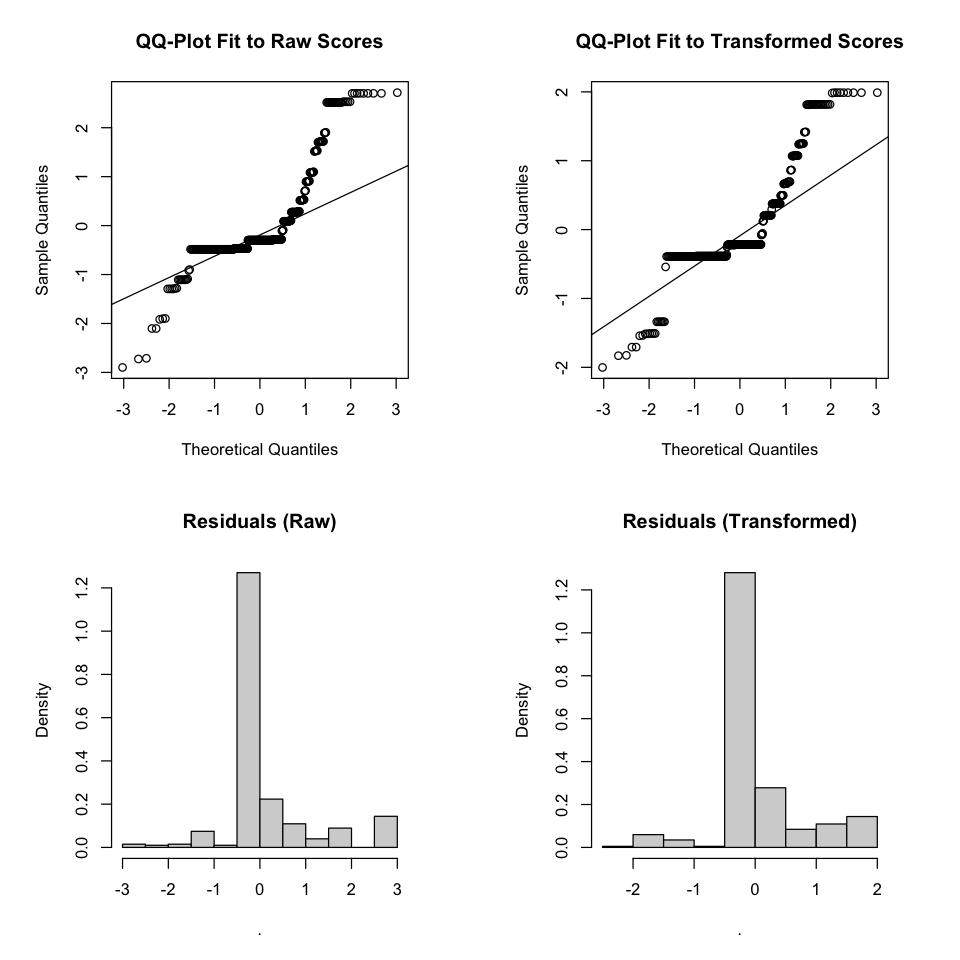

In [22]:
resp_princ <- get_emm_diff_rank_trans(data = vcf_data, measure = "resp_princ", 
                                           label = "resp_princ")
plot_qqs_hist(resp_princ)

### Summary Plot

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


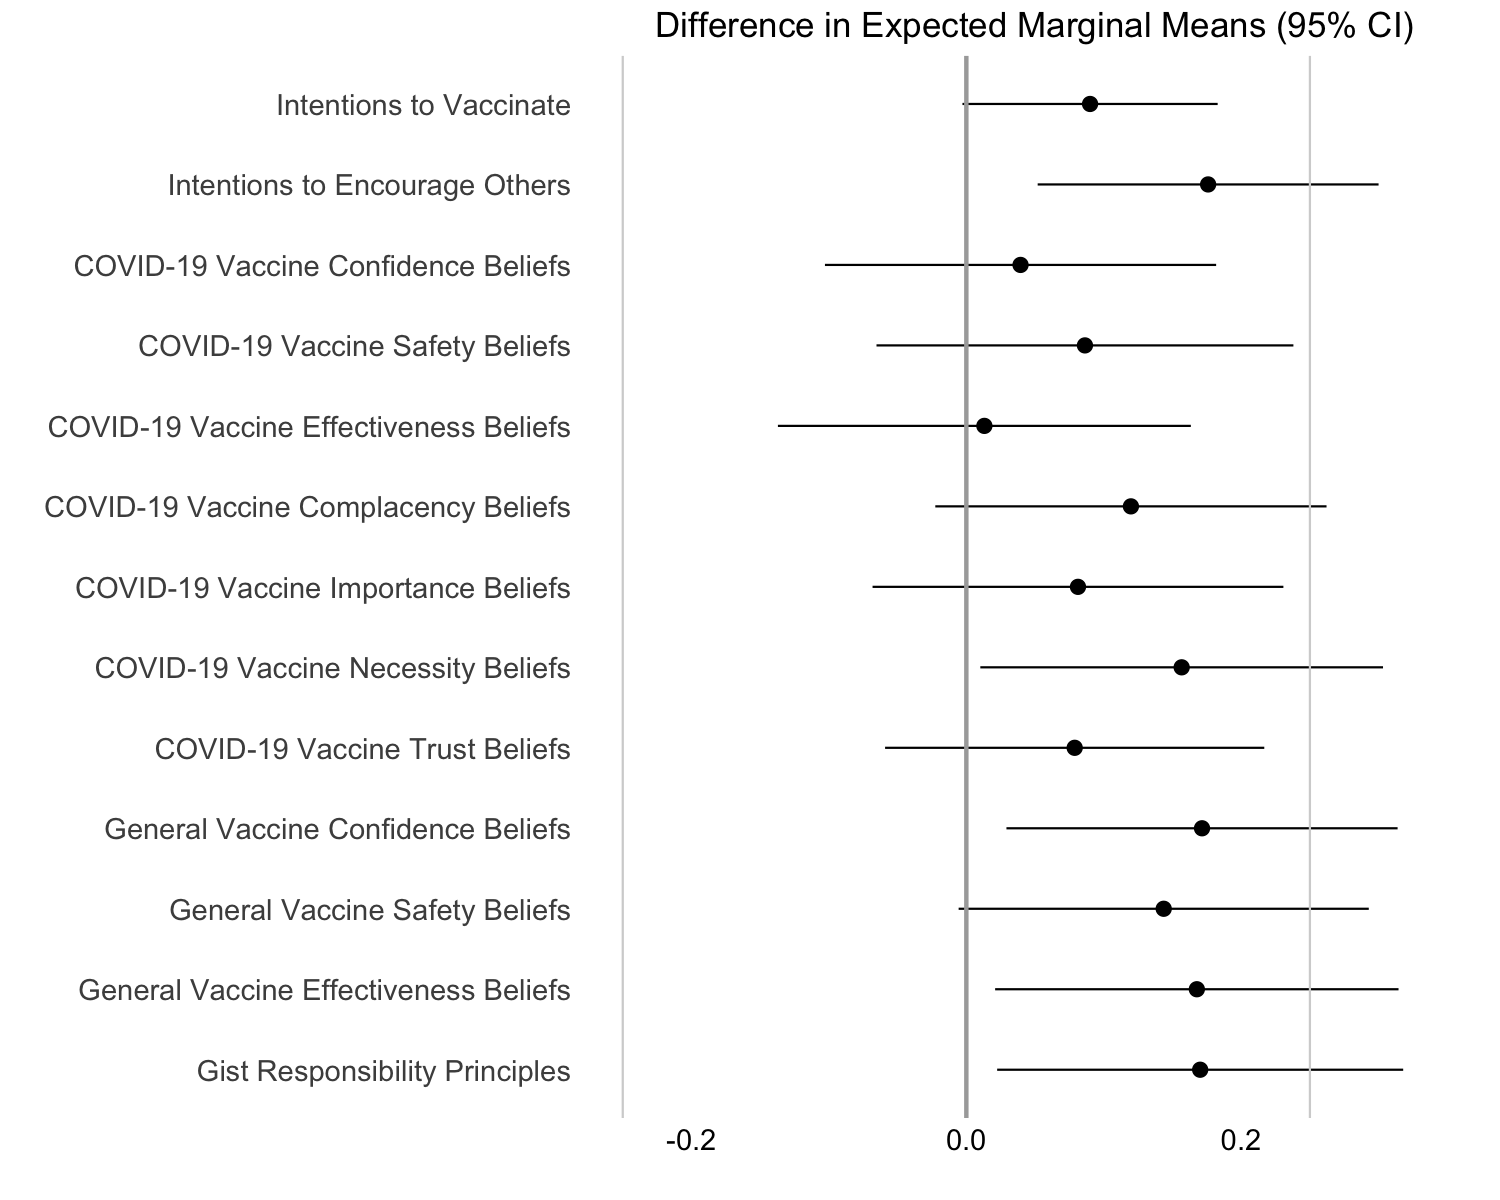

In [23]:
plot_df <- bind_rows(intention$plot_points %>% mutate(y = 12, label = "Intentions to Vaccinate"),
                     encourage$plot_points %>% mutate(y = 11, label = "Intentions to Encourage Others"),
                     sp_confidence$plot_points %>% mutate(y = 10, label = "COVID-19 Vaccine Confidence Beliefs"),
                     sp_safety$plot_points %>% mutate(y = 9, label = "COVID-19 Vaccine Safety Beliefs"),
                     sp_efficacy$plot_points %>% mutate(y = 8, label = "COVID-19 Vaccine Effectiveness Beliefs"),
                     sp_complacency$plot_points %>% mutate(y = 7, label = "COVID-19 Vaccine Complacency Beliefs"),
                     sp_importance$plot_points %>% mutate(y = 6, label = "COVID-19 Vaccine Importance Beliefs"),
                     sp_necessity$plot_points %>% mutate(y = 5, label = "COVID-19 Vaccine Necessity Beliefs"),
                     sp_trust$plot_points %>% mutate(y = 4, label = "COVID-19 Vaccine Trust Beliefs"),
                     gen_confidence$plot_points %>% mutate(y = 3, label = "General Vaccine Confidence Beliefs"),
                     gen_safety$plot_points %>% mutate(y = 2, label = "General Vaccine Safety Beliefs"),
                     gen_efficacy$plot_points %>% mutate(y = 1, label = "General Vaccine Effectiveness Beliefs"),
                     resp_princ$plot_points %>% mutate(y = 0, label = "Gist Responsibility Principles"))
plot_df_means <- plot_df[seq(2, nrow(plot_df), by = 3),]
labels <- plot_df$label %>% unique()
breaks <- plot_df$y %>% unique()

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 150)
ggplot(data = plot_df,
       mapping = aes(x = x, y = y)) +
  geom_line(data = plot_df,
            mapping = aes(x = x, y = y, group = label, color = "black")) +
  geom_point(data = plot_df_means,
             mapping = aes(x = x, y = y, group = label, color = "black"), 
             shape = 21, size = 3, fill = "black") +
  theme_minimal() +
    scale_color_manual(values = "black") +       
    scale_y_continuous(
      breaks = breaks,
      labels = labels) +
    labs(
      x = "",
      y = " ",
      title = "Difference in Expected Marginal Means (95% CI)") +
    geom_vline(xintercept =  0, color = "darkgray", size = 1) +
    geom_vline(xintercept =  -0.25, color = "lightgray") +
    geom_vline(xintercept =  0.25, color = "lightgray") +
    theme( 
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size = 14, color= "black"),
          axis.text.y = element_text(size = 14),
          title = element_text(size = 14)) +
    #theme(panel.border=element_rect(linetype=1,fill=NA)) +
    guides(color = "none") +
    theme(plot.title = element_text(hjust = 0.5)) +
  xlim(-0.25, 0.35)

In [24]:
bind_rows(
      tibble(measure = "Intentions to Vaccinate", CI = intention$CI),
      tibble(measure = "Intentions to Encourage Others to Vaccinate", CI = encourage$CI),
      tibble(measure = "COVID-19 Vaccine Confidence", CI = sp_confidence$CI),
      tibble(measure = "COVID-19 Vaccine Safety", CI = sp_safety$CI),
      tibble(measure = "COVID-19 Vaccine Effectiveness", CI = sp_efficacy$CI),
      tibble(measure = "COVID-19 Vaccine Complacency", CI = sp_complacency$CI),
      tibble(measure = "COVID-19 Vaccine Importance", CI = sp_importance$CI),
      tibble(measure = "COVID-19 Vaccine Necessity", CI = sp_necessity$CI),
      tibble(measure = "COVID-19 Vaccine Trust", CI = sp_trust$CI),
      tibble(measure = "General Vaccine Confidence", CI = gen_confidence$CI),
      tibble(measure = "General Vaccine Safety", CI = gen_safety$CI),
      tibble(measure = "General Vaccine Effectiveness", CI = gen_efficacy$CI),
      tibble(measure = "Responsibility to Vaccinate", CI = resp_princ$CI)) %>%
    mutate(print = paste0(measure, " (", CI, ")")) %>%.$print %>% print()


 [1] "Intentions to Vaccinate (mean = 0.09; 95% CI = -0.003, 0.183; P = 0.0573)"                  
 [2] "Intentions to Encourage Others to Vaccinate (mean = 0.176; 95% CI = 0.052, 0.3; P = 0.0055)"
 [3] "COVID-19 Vaccine Confidence (mean = 0.039; 95% CI = -0.103, 0.182; P = 0.5862)"             
 [4] "COVID-19 Vaccine Safety (mean = 0.086; 95% CI = -0.065, 0.238; P = 0.264)"                  
 [5] "COVID-19 Vaccine Effectiveness (mean = 0.013; 95% CI = -0.137, 0.163; P = 0.8638)"          
 [6] "COVID-19 Vaccine Complacency (mean = 0.12; 95% CI = -0.023, 0.262; P = 0.0989)"             
 [7] "COVID-19 Vaccine Importance (mean = 0.081; 95% CI = -0.068, 0.231; P = 0.286)"              
 [8] "COVID-19 Vaccine Necessity (mean = 0.157; 95% CI = 0.01, 0.303; P = 0.0361)"                
 [9] "COVID-19 Vaccine Trust (mean = 0.079; 95% CI = -0.059, 0.217; P = 0.2619)"                  
[10] "General Vaccine Confidence (mean = 0.17; 95% CI = 0.03, 0.31; P = 0.0183)"                  
[11] "Gene

## Interaction Effects

### Know someone diagnosed

In [25]:
# Collapse groups
vcf_data$know_someone_diagnosed2 <- vcf_data$know_someone_diagnosed
vcf_data$know_someone_diagnosed2 <- factor(vcf_data$know_someone_diagnosed2,
                         levels = c("No", "Yes"))

# Define pre and posttest variables
pretest <- "base_intention"
posttest <- "intention_6"
  
# Filter dataframe to include only people who did 6-week follow up
temp <- vcf_data[vcf_data[,posttest] %>% 
                 is.na() == FALSE, c("group", "trial", "know_someone_diagnosed",
                                     pretest, posttest)]
temp$group <- factor(temp$group, levels = c("Control", "Treatment"))
    
# Apply rank transform to pretest data 
temp[,pretest] <- temp[,pretest] %>% unlist() %>% as.numeric() %>% rank()
    
# Apply rank transform to posttest data 
temp[,posttest] <- temp[,posttest] %>% unlist() %>% as.numeric() %>% rank()
    
# Calculate mean and standard deviation of ranks across all periods
base_ranks <- temp[,pretest] %>% unlist() %>% as.numeric() %>% rank()
two_wk_ranks <- vcf_data[,str_replace(posttest, "_[0-9]","_2")] %>% 
  unlist() %>% na.omit() %>% as.numeric() %>% rank()
four_wk_ranks <- vcf_data[,str_replace(posttest, "_[0-9]","_4")] %>% 
  unlist() %>% na.omit() %>% as.numeric() %>% rank()
six_wk_ranks <- vcf_data[,str_replace(posttest, "_[0-9]","_6")] %>% 
  unlist() %>% na.omit() %>% as.numeric() %>% rank()
mean_rank <- mean(c(base_ranks, two_wk_ranks, four_wk_ranks, six_wk_ranks))
sd_rank <- sd(c(base_ranks, two_wk_ranks, four_wk_ranks, six_wk_ranks))
  
# Apply z-transform
temp[,pretest] <- ((temp[,pretest] %>% unlist()) - mean_rank)/sd_rank
temp[,posttest] <- ((temp[,posttest] %>% unlist()) - mean_rank)/sd_rank
  
# Fit a linear model
formula = paste0(posttest, " ~ ", pretest, " + group + trial + group*know_someone_diagnosed")
model <- lm(formula, data = temp)
model_summary <- summary(model)

ci_mean <- model$coefficients[6]
ci_low <- confint(model)[6,1]
ci_high <- confint(model)[6,2]
p_val <- round(coef(summary(model))[6,4], 4)

print(paste0("mean = ", round(ci_mean, 3), 
             " 95% CI ", round(ci_low, 3), " to ", round(ci_high, 3),
             ", p = ", p_val))

[1] "mean = 0.637 95% CI 0.084 to 1.19, p = 0.0241"


### Liberal

In [26]:
vcf_data$liberal <- "liberal"
vcf_data$liberal[vcf_data$political_view2 != "Liberal"] <- "not_liberal"
vcf_data$liberal <- factor(vcf_data$liberal, 
                           levels = c("not_liberal", "liberal"))

# Define pre and posttest variables
pretest <- "base_intention"
posttest <- "intention_6"
  
# Filter dataframe to include only people who did 6-week follow up
temp <- vcf_data[vcf_data[,posttest] %>% 
                 is.na() == FALSE, c("group", "wave", "political_view2",
                                     pretest, posttest)]
temp$group <- factor(temp$group, levels = c("Control", "Treatment"))
nrow(temp)
    
# Apply rank transform to pretest data 
temp[,pretest] <- temp[,pretest] %>% unlist() %>% as.numeric() %>% rank()
    
# Apply rank transform to posttest data 
temp[,posttest] <- temp[,posttest] %>% unlist() %>% as.numeric() %>% rank()
    
# Calculate mean and standard deviation of ranks across all periods
base_ranks <- temp[,pretest] %>% unlist() %>% as.numeric() %>% rank()
two_wk_ranks <- vcf_data[,str_replace(posttest, "_[0-9]","_2")] %>% 
  unlist() %>% na.omit() %>% as.numeric() %>% rank()
four_wk_ranks <- vcf_data[,str_replace(posttest, "_[0-9]","_4")] %>% 
  unlist() %>% na.omit() %>% as.numeric() %>% rank()
six_wk_ranks <- vcf_data[,str_replace(posttest, "_[0-9]","_6")] %>% 
  unlist() %>% na.omit() %>% as.numeric() %>% rank()
mean_rank <- mean(c(base_ranks, two_wk_ranks, four_wk_ranks, six_wk_ranks))
sd_rank <- sd(c(base_ranks, two_wk_ranks, four_wk_ranks, six_wk_ranks))
  
# Apply z-transform
temp[,pretest] <- ((temp[,pretest] %>% unlist()) - mean_rank)/sd_rank
temp[,posttest] <- ((temp[,posttest] %>% unlist()) - mean_rank)/sd_rank
  
# Fit a linear model
formula = paste0(posttest, " ~ ", pretest, " + group + wave + group*political_view2")
model <- lm(formula, data = temp)
model_summary <- summary(model)
print(model_summary)

ci_mean <- model$coefficients[5]
ci_low <- confint(model)[5,1]
ci_high <- confint(model)[5,2]
p_val <- round(coef(summary(model))[5,4], 4)

print(paste0("mean = ", round(ci_mean, 3), 
             " 95% CI ", round(ci_low, 3), " to ", round(ci_high, 3),
             ", p = ", p_val))

[1] 402


Call:
lm(formula = formula, data = temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1474 -0.4866 -0.2309  0.4298  2.4396 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 0.11533    0.10880   1.060   0.2898
base_intention                              0.64751    0.04355  14.867   <2e-16
groupTreatment                             -0.00362    0.14128  -0.026   0.9796
waveWave 2                                  0.01990    0.08766   0.227   0.8205
political_view2Liberal                     -0.31744    0.16566  -1.916   0.0561
political_view2Conservative                -0.25932    0.13958  -1.858   0.0639
political_view2No answer                   -0.06012    0.41096  -0.146   0.8838
groupTreatment:political_view2Liberal       0.50162    0.22272   2.252   0.0249
groupTreatment:political_view2Conservative  0.07087    0.18564   0.382   0.7028
groupTreatment:political_view2No answer     0.101